Autorzy:  
- Piotr Bihuniak 226056  
- Damian Cywiński 218396

Serwis Airbnb od 2008 roku umożliwia ludziom na całym świecie wyszukiwanie ofert noclegowych u prywatnych gospodarzy. Obecnie stanowi jedną z najpopularniejszych baz noclegowych, pozwalając na spersonalizowany sposób poznawania świata. Omawiany przez nas zestaw danych opisuje aktywność w serwisie Airbnb, dla Los Angeles, w 2019 roku.  

Dane zawierają wszystkie potrzebne informacje, dzięki którym możemy dowiedzieć się więcej o gospodarzach oferujących swoje mieszkania oraz ogólnej sytuacji noclegowej w Los Angeles.  

Na podstawie danych postaramy się ustalić, między innmi:  
- Czego możemy się dowiedzieć o różnych gospodarzach oraz obszarach administracyjnych w mieście?  
- Czego możemy się nauczyć z prognoz? (np. lokalizacje, ceny, recenzje itp.)  
- Którzy gospodarze są najbardziej zajęci i dlaczego?  

Czy zauważalna jest różnica w zainteresowaniu konkretnymi obszarami miasta i jaka może być tego przyczyna?
Analiza danych dotyczących milionów ofert dostarczanych przez Airbnb jest kluczowa dla firmy. Te miliony ofert generują wiele danych - danych, które można analizować i wykorzystywać do celów bezpieczeństwa, decyzji biznesowych, zrozumienia zachowania i wydajności klientów i dostawców (gospodarzy). Analiza ta pozwala wyciągnąć ważne wnioski oraz w odpowiedni sposób kierować inicjatywami marketingowymi oraz wdrażaniem innowacyjnych usług.

W tym miejscu zostały zaimportowane wszystkie potrzebne biblioteki, które zostaną wykorzystane do analizy danych zaczytanych z pliku csv.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

Następnie, z pomocą biblioteki Pandas, zostanie wczytany plik AB_Los_Angeles_2019.csv.
Plik z danymi został pobrany ze strony: http://insideairbnb.com/get-the-data.html

In [2]:
airbnb=pd.read_csv(r'C:\Users\sagiton\Desktop\JupyterProject2\AB_Los_Angeles_2019.csv')

In [ ]:
Aby dowiedzieć się jakimi danymi dysponuje wczytany plik, wyświetlimy 10 pierwszych wierszy.
Wiedza ta posłuży do podjęcia decyzji, w jaki sposób możemy analizować dane.

In [3]:
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,248
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.19,1,62
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,2019-08-31,0.33,2,252
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,2019-10-03,0.19,2,344
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0
5,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98833,-118.43224,Private room,75,30,305,2019-11-27,2.41,4,326
6,5729,Zen Room with Floating Bed near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98685,-118.43266,Private room,105,30,217,2019-11-20,1.74,4,300
7,5843,Artist Oasis near Venice Beach w/ Beautiful Ga...,9171,Sanni,City of Los Angeles,Del Rey,33.98782,-118.43170,Entire home/apt,303,1,114,2019-11-22,1.09,4,116
8,6033,Poolside Serenity Studio,11619,Sarah,City of Los Angeles,Woodland Hills,34.16825,-118.64438,Private room,85,3,22,2018-01-17,0.18,5,0
9,6931,Off Sunset Wrap-Around Terr Runyon Canyon View...,3008,Chas.,City of Los Angeles,Hollywood,34.09521,-118.34801,Private room,99,30,18,2019-11-01,0.14,2,250


Kolejnym krokiem było sprawdzenie, jak duże są nasze dane.

Ich liczba przekracza 40 tysięcy rekordów, a więc jest to taki rozmiar danych, który pozwoli nam na przeprowadzenie badań oraz wyciągnięcie wniosków dobrze opisujących sytuację AirBnB w Los Angeles.

Gdyby rozmiar danych był mały, wykonane badania mogłyby słabo odzwierciedlać rzeczywistość.

In [4]:
len(airbnb)

40125

Po poznaniu pierwszych paru rekordów, warto również sprawdzić jakich typów są poszczególne kolumny.
Trzeba zaznaczyć, że w poniższej tabeli typ object to tak naprawdę string.

In [5]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Po wstępnej analizie, przychodzi etap oczyszczania danych z kolumn i wierszy, które mogą być uszkodzone lub niepotrzebne do dalszych badań.

In [6]:
airbnb.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                          435
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8145
reviews_per_month                 8145
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Zostały odrzucone kolumny, które nie będą nam potrzebne w dalszej analizie: 
- id - nie wprowadza nic waznego do naszej analizy. 
- host_name - analizowanie danych pod kątem konkretnych jednostek zatraca obiektywizm.
- last_review - w analizie jakości data ostatniej opinii nie ma znaczenia.

In [7]:
airbnb.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

Po oczyszczeniu danych zostały wyświetlone początkowe rekordy, w celu sprawdzenia czy operacja zakończyła się sukcesem.

In [8]:
airbnb.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Amazing bright elegant condo park front *UPGRA...,521,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,0.02,1,248
1,Family perfect;Pool;Near Studios!,767,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,0.19,1,62
2,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,0.33,2,252
3,Zen Life at the Beach,3041,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,0.19,2,344
4,*Upscale Professional Home with Beautiful Studio*,3207,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,1,0


Po oczyszczeniu danych, z kolumn w których brakowało wartości, została tylko kolumna reviews_per_month.

Aby móc analizować dane pod kątem ilości opini na miesiąc wartość NaN została zastąpiona zerem.

In [9]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)

airbnb.reviews_per_month.isnull().sum()

0

Następnie zostało ustalone, na jakie grupy obszarów dzieli miasto serwis AirBnB.

Są to trzy grupy: miasto właściwe, miasta przylegające oraz tereny niemunicypalne.

In [10]:
airbnb.neighbourhood_group.unique()

array(['Other Cities', 'City of Los Angeles', 'Unincorporated Areas'],
      dtype=object)

Kolejnym krokiem było wyświetlenie wszystkich obszarów. 

Ich analiza jest oczywiście trudniejsza, ponieważ w stosuku do grup obszarów jest ich dużo.

In [11]:
airbnb.neighbourhood.unique()

array(['Culver City', 'Burbank', 'Hollywood', 'Santa Monica',
       'Bellflower', 'Del Rey', 'Woodland Hills', 'Atwater Village',
       'Beverly Hills', 'Venice', 'Long Beach', 'Redondo Beach',
       'Mid-Wilshire', 'Gardena', 'Hollywood Hills', 'Elysian Valley',
       'Torrance', 'Mid-City', 'Valley Village', 'Highland Park',
       'Silver Lake', 'Glendale', 'Mount Washington', 'West Los Angeles',
       'East Hollywood', 'Los Feliz', 'Fairfax', 'Chinatown', 'Mar Vista',
       'Malibu', 'Jefferson Park', 'Studio City', 'Downtown', 'Lynwood',
       'Glassell Park', 'Granada Hills', 'Carthay', 'Echo Park',
       'Harvard Heights', 'Hollywood Hills West', 'West Hollywood',
       'Elysian Park', 'Beverlywood', 'Cheviot Hills', 'Encino',
       'Lakewood', 'View Park-Windsor Hills', 'North Hills', 'Tujunga',
       'Westchester', 'Westlake', 'Carson', 'North Hollywood', 'Bel-Air',
       'Altadena', 'Calabasas', 'Pacific Palisades', 'Topanga',
       'Valley Glen', 'Manhattan Beac

Rzeczą, która również została zbadana, są typy dostępnych pokojów.

In [12]:
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

Powyższe zabiegi, czyli wyświetlanie różnych kategorii danych, takich jak grupa dzielnic, dzielnica czy typ pokoju, pozwalają lepiej zrozumieć dane.

Dzięki tej fazie projektu możliwe jest zrozumienie co jest możliwe do zbadania, nasuwają się również pierwsze pomysły na badania.

Kolejnym krokiem będzie data-exploring oraz wizaluzacji danych.

Pierwszym badaniem będzie sprawdzenie ilości ofert na jednego hosta w Airbnb.

Na początku zostanie wyświetlona liczba wszystkich hostów. 

In [13]:
len(airbnb.host_id.unique())

23369

Liczba wszystkich ofert, jak zostało zaprezentowane w początkowej analizie, to ponad 40 tysięcy,
więc już na pierwszy rzut oka widać, że średnia ilość ofert na jednego hosta to w zaokrągleniu 2. 

Poniżej obliczona średnia:

In [14]:
np.average(airbnb.host_id.value_counts())

1.7170182720698361

Wynika z tego, że najwięcej hostów posiada jedną lub dwie oferty.
Których z tej grupy jest więcej zostanie sprawdzone za pomocą najczęściej wsytępującej wartości oraz mediany.

In [15]:
np.argmax(np.bincount(airbnb.host_id.value_counts()))

1

In [16]:
np.median(airbnb.host_id.value_counts())

1.0

Wynika z tego, że najwięcej hostów ma tylko jedną ofertę.
Kolejnym krokiem będzie sprawdzenie jak wygląda lista 15 hostów z największą liczbą ofert.

In [17]:
hosts_by_number_of_offers=airbnb.host_id.value_counts().head(15)
hosts_by_number_of_offers

48005494     185
107434423    162
154113511     89
129783732     75
147398503     67
89613524      62
271118401     62
259274154     61
101537031     60
4140161       59
891818        59
21013529      56
8534462       56
112952162     54
4656446       54
Name: host_id, dtype: int64

Aby lepiej odzwierciedlić dane, zostaną one zwizualizowane.

[Text(0, 0, '48005494'),
 Text(0, 0, '107434423'),
 Text(0, 0, '154113511'),
 Text(0, 0, '129783732'),
 Text(0, 0, '147398503'),
 Text(0, 0, '89613524'),
 Text(0, 0, '271118401'),
 Text(0, 0, '259274154'),
 Text(0, 0, '101537031'),
 Text(0, 0, '4140161'),
 Text(0, 0, '891818'),
 Text(0, 0, '21013529'),
 Text(0, 0, '8534462'),
 Text(0, 0, '112952162'),
 Text(0, 0, '4656446')]

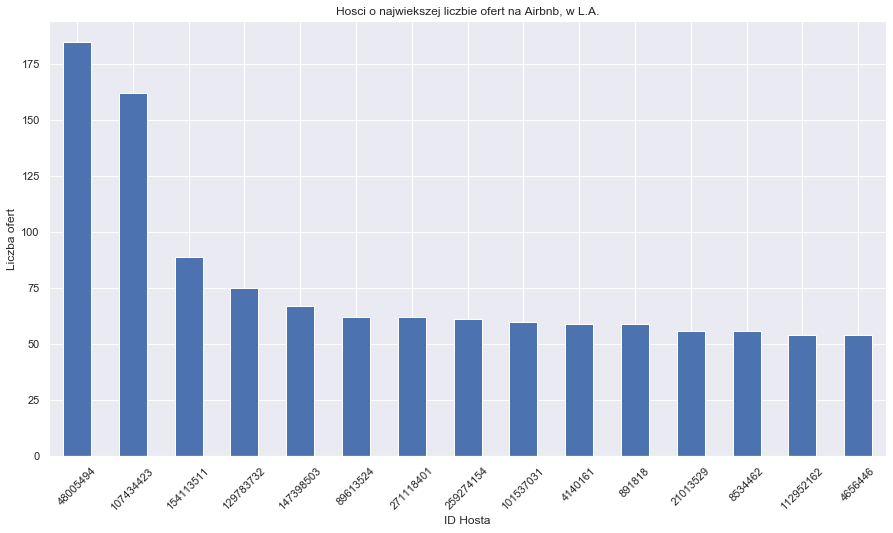

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
hosts_viz_1=hosts_by_number_of_offers.plot(kind='bar')
hosts_viz_1.set_title('Hosci o najwiekszej liczbie ofert na Airbnb, w L.A.')
hosts_viz_1.set_ylabel('Liczba ofert')
hosts_viz_1.set_xlabel('ID Hosta')
hosts_viz_1.set_xticklabels(hosts_viz_1.get_xticklabels(), rotation=45)

Na wykresie widać dwóch dominujących hostów, później ilość dostępnych ofert na hosta spada prawie o połowę i stopniowo maleje.
Ciężko mówić tu jednak o dominacji, ponieważ dwóch pierwszych hostów posiada łącznie 347 ofert, co stanowi 1,5% wszystkich ofert.
Jednakże możemy mówić o dominacji tych dwóch hostów w grupie hostów mających większą ilość ofert.

Następnie zostaną zwizualizowane dane dotyczące cen wynajmu, w zależnosci od grupy obszaru, do którego należą.

Po pierwsze, dane zostaną pogrupowane.

In [19]:
# Miasta przylegające
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Other Cities']
price_sub1=sub_1[['price']]

# Miasto właściwe
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'City of Los Angeles']
price_sub2=sub_2[['price']]

# Obszar niemunicypalny
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Unincorporated Areas']
price_sub3=sub_3[['price']]

price_list=[price_sub1, price_sub2, price_sub3]

Kolejnym krokiem będzie skonstruowanie rozkladu cen dla poszczegolnych grup obszarów.

In [20]:
price_dist_nei=[]

nei_list=['Other Cities', 'City of Los Angeles', 'Unincorporated Areas']

for x in price_list:
    ia=x.describe(percentiles=[.25, .50, .75])
    ia=ia.iloc[3:]
    ia.reset_index(inplace=True)
    ia.rename(columns={'index':'Stats'}, inplace=True)
    price_dist_nei.append(ia)
    
for ja in range(3):
    price_dist_nei[ja].rename(columns={'price':nei_list[ja]}, inplace=True)
    
statistics_df=price_dist_nei
statistics_df=[df.set_index('Stats') for df in statistics_df]
statistics_df=statistics_df[0].join(statistics_df[1:])
statistics_df

,Other Cities,City of Los Angeles,Unincorporated Areas
Stats,,,
min,0.0,0.0,10.0
25%,65.0,75.0,50.0
50%,105.0,115.0,90.0
75%,185.0,195.0,160.0
max,22000.0,25000.0,14500.0


W uzyskanym zbiorze pojawiają się pewne wartości skrajne np. 25000, których musimy się pozbyć
w celu lepszego przedstawienia wynikow na wykresie.

Text(0.5, 1.0, 'Rozkład cen dla każdej grupy obszarów')

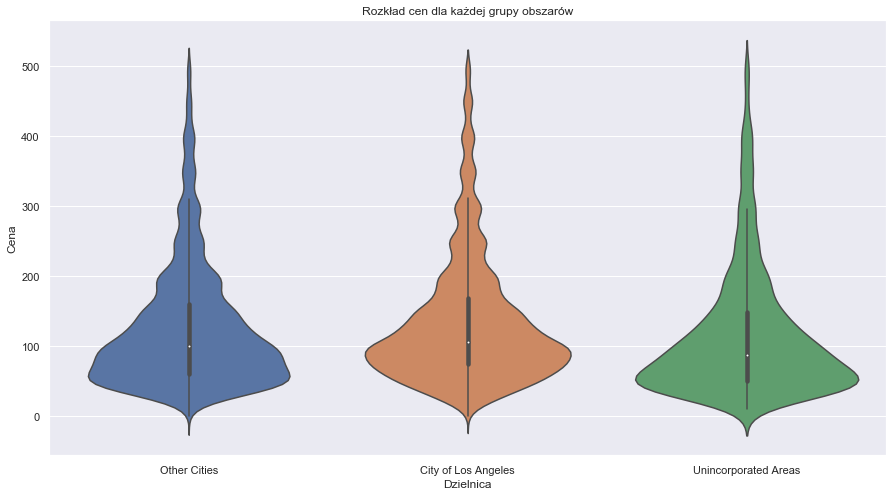

In [21]:
sub_df=airbnb[airbnb.price < 500]

price_neigh_dist_viz=sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')
price_neigh_dist_viz.set_ylabel('Cena')
price_neigh_dist_viz.set_xlabel('Dzielnica')
price_neigh_dist_viz.set_title('Rozkład cen dla każdej grupy obszarów')

Widzimy, ze z posrod wszystkich ofert miasto właściwe Los Angeles ma najszerszy przedzial jesli chodzi o ceny, z najwyzsza srednia cena
wynoszaca $100 za noc. Obszar niemunicypalny  jest najtanszy ze wszystkich dzielnic. Miasta przylegające plasują się natomiast na drugim miejscu.

Wyniki potwierdzają sytuację faktyczną - wszędzie na świecie, im dalsze obrzeża miasta tym taniej za noc.

Po przeanalizowaniu grup obszarów, kolejno zostaną przeanalizowane dzielnice znajdujące się w tych obszarach.

Jak było pokazane w czasie wstępnej analizy, jest ich bardzo dużo, dlatego zostało wybranych 10 z największą liczbą ofert.

In [22]:
airbnb.neighbourhood.value_counts().head(10)

Hollywood          2108
Venice             2106
Long Beach         1764
Downtown           1482
Santa Monica       1252
Hollywood Hills     913
West Hollywood      796
Westlake            685
Koreatown           668
Mid-Wilshire        663
Name: neighbourhood, dtype: int64

Pierwsze dziesięć dzielnic znajduje się tylko w dwóch obszarach, dlatego zostaną również wyświetlone 3 dzielnice z trzeciego obszaru.

In [23]:
sub_3.neighbourhood.value_counts().head(3)

Rowland Heights     575
Topanga             289
Hacienda Heights    252
Name: neighbourhood, dtype: int64

Następnie uzyskane dzielnice zostaną połączone z obszarami na których się znajdują i typami pokojów, które oferują. 

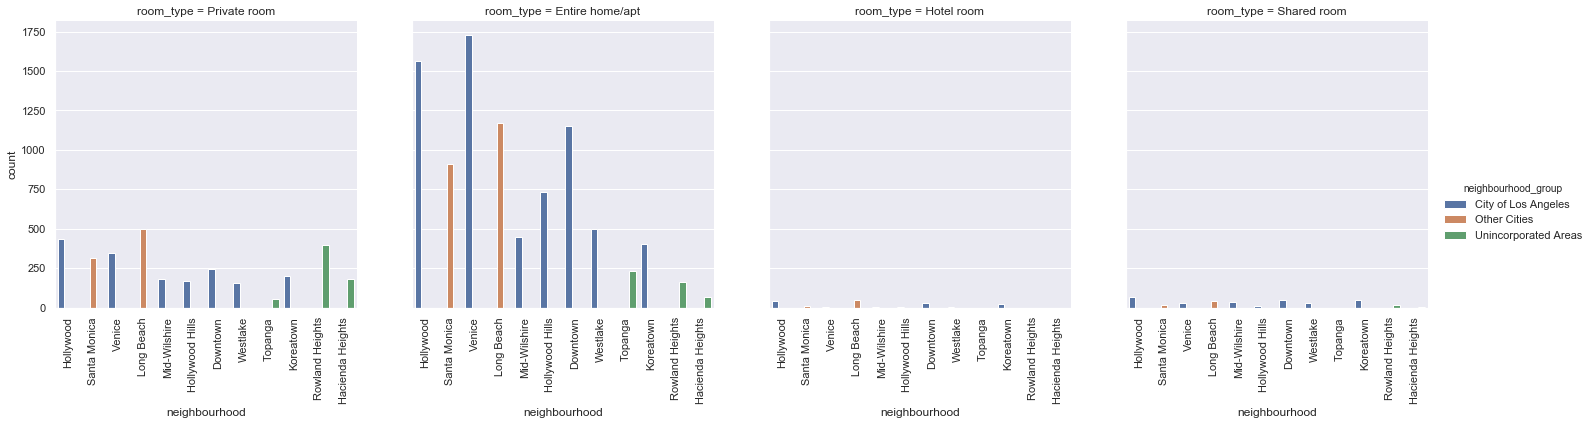

In [24]:
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Hollywood','Venice','Long Beach','Downtown',
                 'Santa Monica','Hollywood Hills','West Hollywood ','Westlake','Koreatown','Mid-Wilshire', 'Rowland Heights', 'Topanga', 'Hacienda Heights'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

Wykres, który został uzyskany, pokazuje jak wygląda liczba ofert z danym typem pokoju w danej dzielnicy.

Jak widać we wszystkich dzielnicach dominuje najwięcej ofert z rezerwacją całego domu lub apartamentu.
Na drugim miejscu znajduje się wynajem prywatnego pokoju, dopiero daleko w tyle możemy znaleźć pokoje hotelowe czy pokoje dzielone.

Ciekawą rzeczą jest fakt, że dla poszczególnych dzielnic ilość ofert z danym typem pokoju jest dość porównywalna.

Natomiast co do rodzajów pokojów to rozkład wydaje się być zgodny z oczekiwaniami, Amerykanie preferują prywatne duże pokoje.

Zastanawiający jest tak mały współczynnik dla pokoi hotelowych, aczkolwiek z pewnością wynika to z faktu, że serwis AirBnb po prostu nie służy do wyszukiwania ofert tego typu.

W analizowanych danych posiadamy również atrybuty odpowiadające za długość i szerokość geograficzną.
Z ich pomocą zostało sprawdzone jak wygląda rozkład cen w przestrzeni.

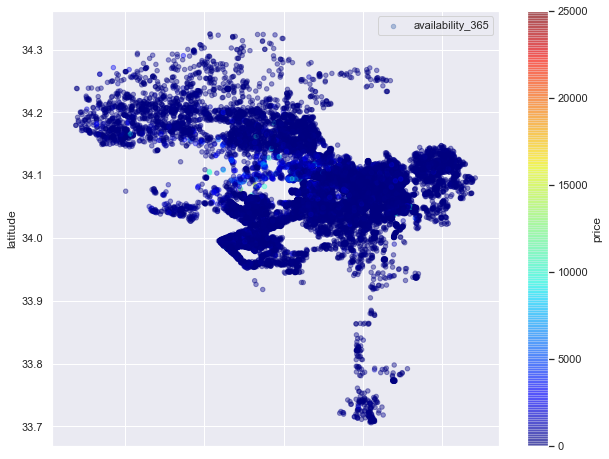

In [25]:
viz_4=sub_2.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

Jak można zobaczyć na wygenerowanym obrazie, współrzędne stworzyły coś na kształ mapy.
Jednakże bez porównania tego z mapą Los Angeles niewiele mówi to oglądającemu.

Dlatego w następnym przykładzie zostanie dodana mapa Los Angeles, znaleziona na wikipedi oraz maksymalna cena oferty zostanie ograniczona do 500$ za noc,
aby było widać różnorodność cen. Przez nieliczne wysokie ceny wykres z tego badania jest mało przejrzysty i dominuje w nim kolor niebieski.

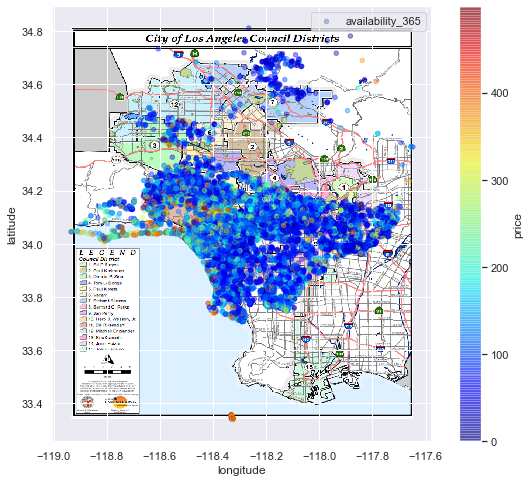

In [26]:
import urllib
plt.figure(figsize=(10,8))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/1/1c/Map_of_LA_City_Council_Districts.png')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[np.min(airbnb.longitude), np.max(airbnb.longitude), np.min(airbnb.latitude), np.max(airbnb.latitude)])
ax=plt.gca()
sub_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

Po nałożeniu ofert na mapę dużo łatwej zauważyć, że najwięcej jest ich w centrum miasta, idąc od morza na wschód, co pokrywa się z miastem właściwym Los Angeles.
Widać też, że najwięcej ofert jest z przedziału 0 - 100$, te z przedziału 100 - 200$ występują częściej w dzielnicach znanych na całym świecie ze swojego prestiżu a zarazem bogacta.

Kropeczek naprawde drogich, czyli innych niż niebieskie, jest bardzo mało. Za pewne dlatego, że AirBnb w swoich założeniach ma być tańszą alternatywą dla hoteli.

w następnym eksperymencie zostaną przeanalizowane nazwy ofert.

In [27]:
_names_=[]

for name in airbnb.name:
    _names_.append(name)  
def split_name(name):
    spl=str(name).split()
    return spl
_names_for_count_=[]
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

Dzięki tak przygotowanym danym możliwe jest policzenie i  wyświetlnie diagramu 25 najczęściej pojawiających się słów w nazwach ofert.

In [28]:
from collections import Counter
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

Aby lepiej to przedstawić, stworzymy diagram.

In [29]:
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'private'),
 Text(0, 0, 'room'),
 Text(0, 0, 'the'),
 Text(0, 0, 'hollywood'),
 Text(0, 0, 'home'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'beach'),
 Text(0, 0, 'with'),
 Text(0, 0, 'to'),
 Text(0, 0, 'house'),
 Text(0, 0, '&'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'and'),
 Text(0, 0, 'of'),
 Text(0, 0, '-'),
 Text(0, 0, 'near'),
 Text(0, 0, 'la'),
 Text(0, 0, 'apartment'),
 Text(0, 0, '2'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'hills'),
 Text(0, 0, 'a'),
 Text(0, 0, '1')]

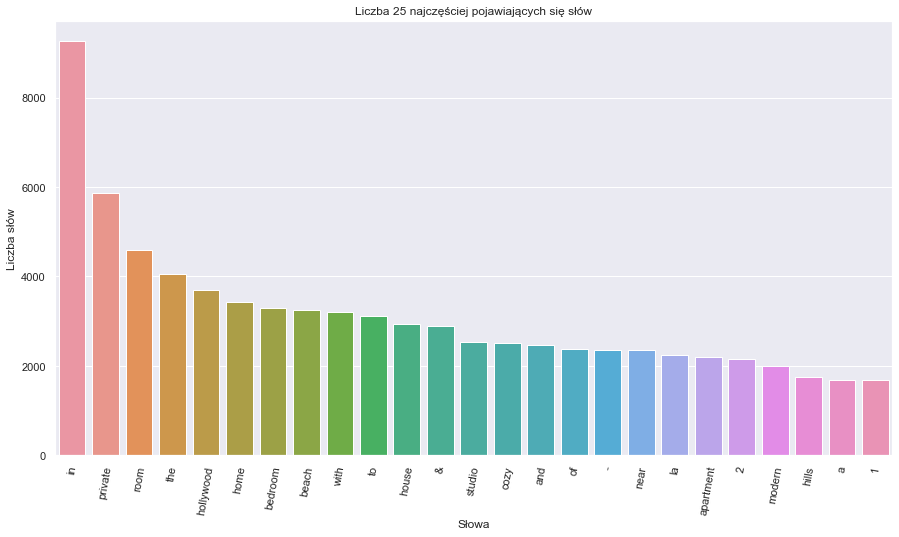

In [30]:
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Liczba 25 najczęściej pojawiających się słów')
viz_5.set_ylabel('Liczba słów')
viz_5.set_xlabel('Słowa')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

Najczęściej pojawiające się słowa to w dużej mierze przyimki, ale także takie słowa jak prywatny, pokój czy Hollywood.
Jest to również zgodne z intuicją, ludzie wyszukując zakwaterowania używają takich słów jak prywatny i pokój, a przecież Hollywood to miejsce znane na całym świecie, nic więc dziwnego, że turyści chcą spać właśnie tam, więc szukają ofert w tym rejonie.

Na końcu zostanie wyświetlona lista 10 ofert z najlepszą recencją.

In [31]:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
28,Venice Beach Walkstreet Getaway,60473,City of Los Angeles,Venice,33.99359,-118.46049,Entire home/apt,140,2,788,6.54,1,0
1779,"Private 1906 Bungalow, 3 Blks from Beach",10265095,Other Cities,Santa Monica,34.00434,-118.48437,Entire home/apt,95,1,753,10.88,3,62
819,MALIBU AIRSTREAM TRAILER MOUNTAIN ADVENTURE,4308078,Unincorporated Areas,Unincorporated Santa Monica Mountains,34.09261,-118.86987,Entire home/apt,235,1,749,8.80,1,57
148,2 Room Poolside Guesthouse +bikes,552845,Other Cities,Long Beach,33.77391,-118.12369,Entire home/apt,90,1,681,6.64,1,0
505,MY HOLLYWOOD SPACE RENTALS #15,2622454,City of Los Angeles,Hollywood,34.10200,-118.32855,Private room,65,1,670,7.46,10,1
1403,Tracy's TeenyTiny Castle*\nFeel Enchanted&Magical,1648958,City of Los Angeles,Venice,33.98672,-118.45983,Private room,73,1,662,8.60,6,1
1265,"Lovely Home, Super MidCity Location",6911978,City of Los Angeles,Mid-Wilshire,34.05026,-118.34186,Private room,65,1,648,8.25,2,35
2864,Venice Beach Cabana,20089599,City of Los Angeles,Venice,33.99335,-118.47704,Entire home/apt,125,1,648,10.06,1,257
1418,Bike Around Town from the Sweetest Cottage in ...,994477,City of Los Angeles,Venice,33.98869,-118.45591,Entire home/apt,175,30,635,8.33,1,0
4578,Venice Beach Guest Studio with Pool and Hot Tub,33610399,City of Los Angeles,Venice,33.99444,-118.46396,Entire home/apt,115,1,622,11.29,1,1


Zostanie obliczona średnia cena za najlepszy apartamet.

In [32]:
price_avrg=top_reviewed_listings.price.mean()
print('Średnia cena za noc: {}'.format(price_avrg))

Średnia cena za noc: 117.8


Wbrew pozorą średnia cena za najlepszy apartament nie jest dużo większa od większości cen jak wynika z mapy cen wyświetlonej we wcześniejszym badaniu.
Wynika z tego, że warto szukać apartamentów z najlepszymi opiniami, ponieważ nie różnią się znacznie cenami od konkurencji.

Omawiany przez nas zestaw danych okazał się być bardzo bogatym źródłem wiedzy, pozwalającym na głęboką eksplorację pod kątem większości z atrybutów.  

Po pierwsze, znaleźliśmy hostów, którzy wyróżniają się w serwisie, ze względu na największą liczbę ofert. Okazało się, że najbardziej aktywny gospodarz posiada aż 185 ofert. Przeprowadziliśmy analizę obszarów administracyjnych miasta, ustalając które cieszą się największą popularnością.  

Dzięki wiedzy na temat szerokości oraz długości geograficznej każdej z ofert, stworzyliśmy geograficzną mapę cieplną, której kolory odnoszą się do cen panujących w danym obszarze miasta.  

Zbadaliśmy kluczowe słowa, których gospodarze używali do opisu swoich ofert, a na koniec znaleźliśmy najczęściej przeglądane oferty i przeanalizowaliśmy kilka dodatkowych atrybutów.  

W dalszej eksploracji naszych danych przydatne byłyby informacje dotyczące pozytywnych oraz negetywnych recenzji, zwłaszcza średnia ocena dla każdej z oferty. Dzięki temu moglibyśmy przeanalizować najlepiej ocenianych gospodarzy w Los Angeles (a nie tylko tych najbardziej aktywnych).  

Ostatecznie odkryliśmy sporo interesujących związków między cechami. Każdy z kroków, który doprowadził nas do postawionych wniosków, staraliśmy sięjak najlepiej opisać.  

Podobne analizy, choć na wyższym poziomie, przeprowadzane są w oficjalnym zespole Airbnb Data / Machine Learning, umożliwiając firmie podejmowane lepszych decyzji biznesowych w codziennym funkcjonowaniu.  

Bibliografia:  
1. Data Analysis and Visualization Using Python, Embarak Dr. Ossama  
2. Python for Everybody: Exploring Data Using Python 3, Charles Severance  
3. Web Data Mining: Exploring Hyperlinks, Contents, and Usage Data, Bing Liu  
4. Exploring data Catherine Marsh
